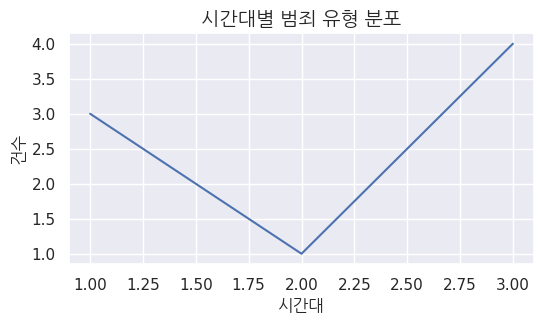

In [70]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 테스트 그래프 (폰트 직접 지정)
plt.figure(figsize=(6, 3))
plt.plot([1, 2, 3], [3, 1, 4])
plt.title("시간대별 범죄 유형 분포", fontproperties=font_prop, fontsize=14)
plt.xlabel("시간대", fontproperties=font_prop)
plt.ylabel("건수", fontproperties=font_prop)
plt.show()


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=font_prop.get_name())
# 1. 데이터 불러오기
df = pd.read_csv("전처리_시간대별_강력범죄_및_인구환경데이터.csv")


In [72]:
sns.set(font=font_prop.get_name())

In [73]:
# [3] 시간대별 범죄 유형 분포
crime_cols = [
    '살인기수', '살인미수등', '강도', '강간', '유사강간', '강제추행',
    '기타 강간 강제추행등', '방화', '상해', '폭행', '체포 감금', '협박',
    '약취 유인', '폭력행위등', '공갈'
]
crime_df = df[['시간대'] + crime_cols].set_index('시간대').T

In [74]:
# [4] 시간대별 인구 분포 (정규화된 시간대 기준)
pop_cols = [
    '시간대_내국_유소년',
    '시간대_내국_생산가능',
    '시간대_내국_고령',
    '시간대_외국_TEMP',
    '시간대_외국_LONG'
]
pop_df = df[['시간대'] + pop_cols].set_index('시간대').T

In [75]:
# [5] 시간대별 환경 데이터 (조도/소음)
env_df = df[['시간대', '조도 평균(lux)', '소음 평균(dB)']].set_index('시간대')

In [76]:
print(crime_df.shape)
print(pop_df.shape)
print(env_df.shape)

(15, 4)
(5, 4)
(4, 2)


In [77]:
print(df['시간대'].unique())

['00시-06시' '06시-12시' '12시-18시' '18시-24시']


In [78]:
print("범죄 데이터:")
print(crime_df.head())

print("\n인구 데이터:")
print(pop_df.head())

print("\n환경 데이터:")
print(env_df.head())

범죄 데이터:
시간대    00시-06시  06시-12시  12시-18시  18시-24시
살인기수        36       48       71       92
살인미수등       83       73      106      148
강도         236      103      140      188
강간        1515      710      636     1144
유사강간       212      119      115      155

인구 데이터:
시간대           00시-06시   06시-12시   12시-18시   18시-24시
시간대_내국_유소년   0.045850  0.051227  0.055614  0.049266
시간대_내국_생산가능  1.000000  1.000000  1.000000  1.000000
시간대_내국_고령    0.046343  0.053202  0.055487  0.048603
시간대_외국_TEMP  0.000000  0.000000  0.000000  0.000000
시간대_외국_LONG  0.459247  0.432523  0.435204  0.456581

환경 데이터:
         조도 평균(lux)  소음 평균(dB)
시간대                           
00시-06시    0.000000   0.000000
06시-12시    0.388069   0.709473
12시-18시    1.000000   1.000000
18시-24시    0.051943   0.840692


<ipython-input-79-eb8450855a71>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), fontproperties=font_prop)


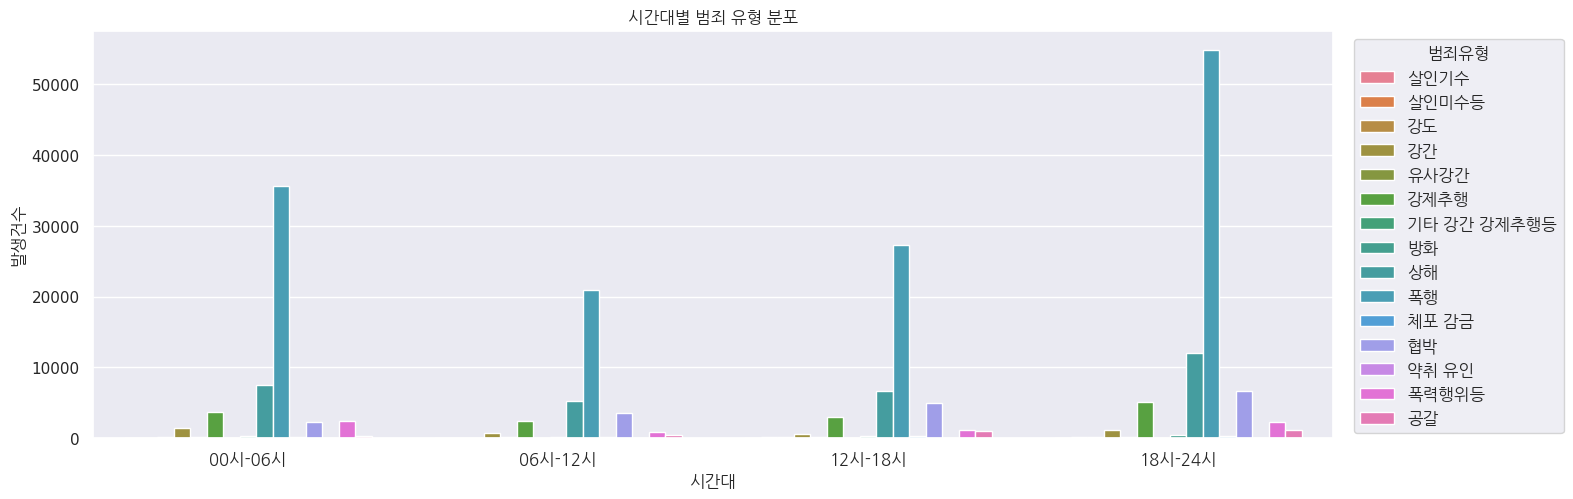

In [79]:
# 범죄: 시간대별 범죄 유형 총합을 long-form으로 변환
crime_long = df.melt(id_vars='시간대', value_vars=crime_cols,
                     var_name='범죄유형', value_name='발생건수')

# 인구: 시간대별 인구군 구성 (시간대 내 정규화된 값)
pop_long = df.melt(id_vars='시간대', value_vars=pop_cols,
                   var_name='인구군', value_name='비율')

# 환경: 그대로 사용

# 시각화 시작
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 18))

# 1. 시간대별 범죄 유형 분포
plt.subplot(3, 1, 1)
ax1 = sns.barplot(data=crime_long, x='시간대', y='발생건수', hue='범죄유형')

plt.title("시간대별 범죄 유형 분포", fontproperties=font_prop)
plt.xlabel("시간대", fontproperties=font_prop)
plt.ylabel("발생건수", fontproperties=font_prop)

# ✅ 범례 객체 받아오기 → 제목 + 항목 폰트 지정
legend = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title="범죄유형", prop=font_prop)
legend.set_title("범죄유형", prop=font_prop)

# ✅ x축 tick 라벨도 한글 폰트 적용
ax1.set_xticklabels(ax1.get_xticklabels(), fontproperties=font_prop)


plt.show()



<ipython-input-63-a37748212185>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), fontproperties=font_prop)


[Text(0, 0, '00시-06시'),
 Text(1, 0, '06시-12시'),
 Text(2, 0, '12시-18시'),
 Text(3, 0, '18시-24시')]

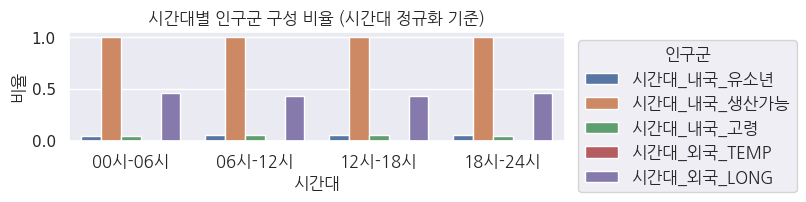

In [63]:
# 2. 시간대별 인구군 비율 (정규화)
plt.subplot(3, 1, 2)
ax2 = sns.barplot(data=pop_long, x='시간대', y='비율', hue='인구군')

# 제목 및 축 라벨 폰트 적용
plt.title("시간대별 인구군 구성 비율 (시간대 정규화 기준)", fontproperties=font_prop)
plt.xlabel("시간대", fontproperties=font_prop)
plt.ylabel("비율", fontproperties=font_prop)

# 범례 제목 및 항목 폰트 적용
legend = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title="인구군", prop=font_prop)
legend.set_title("인구군", prop=font_prop)

# x축 tick 라벨에도 폰트 적용
ax2.set_xticklabels(ax2.get_xticklabels(), fontproperties=font_prop)


<ipython-input-64-b9bc7191a8f0>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), fontproperties=font_prop)


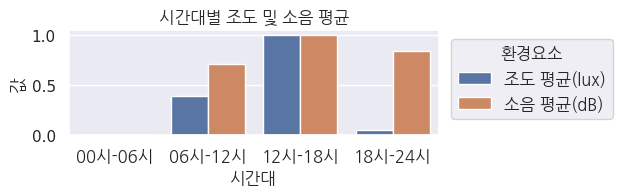

In [64]:
# 3. 조도 및 소음
plt.subplot(3, 1, 3)

# 데이터 변환
env_plot = df[['시간대', '조도 평균(lux)', '소음 평균(dB)']].melt(
    id_vars='시간대', var_name='환경요소', value_name='값'
)

# 시각화
ax3 = sns.barplot(data=env_plot, x='시간대', y='값', hue='환경요소')

# 제목 및 축 라벨 한글 폰트 적용
plt.title("시간대별 조도 및 소음 평균", fontproperties=font_prop)
plt.xlabel("시간대", fontproperties=font_prop)
plt.ylabel("값", fontproperties=font_prop)

# 범례 폰트 적용
legend = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title="환경요소", prop=font_prop)
legend.set_title("환경요소", prop=font_prop)

# x축 tick 라벨 폰트 적용
ax3.set_xticklabels(ax3.get_xticklabels(), fontproperties=font_prop)

plt.tight_layout()


<ipython-input-68-9b92835f4936>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), fontproperties=font_prop)
<ipython-input-68-9b92835f4936>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), fontproperties=font_prop)
<ipython-input-68-9b92835f4936>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(axs[2].get_xticklabels(), fontproperties=font_prop)


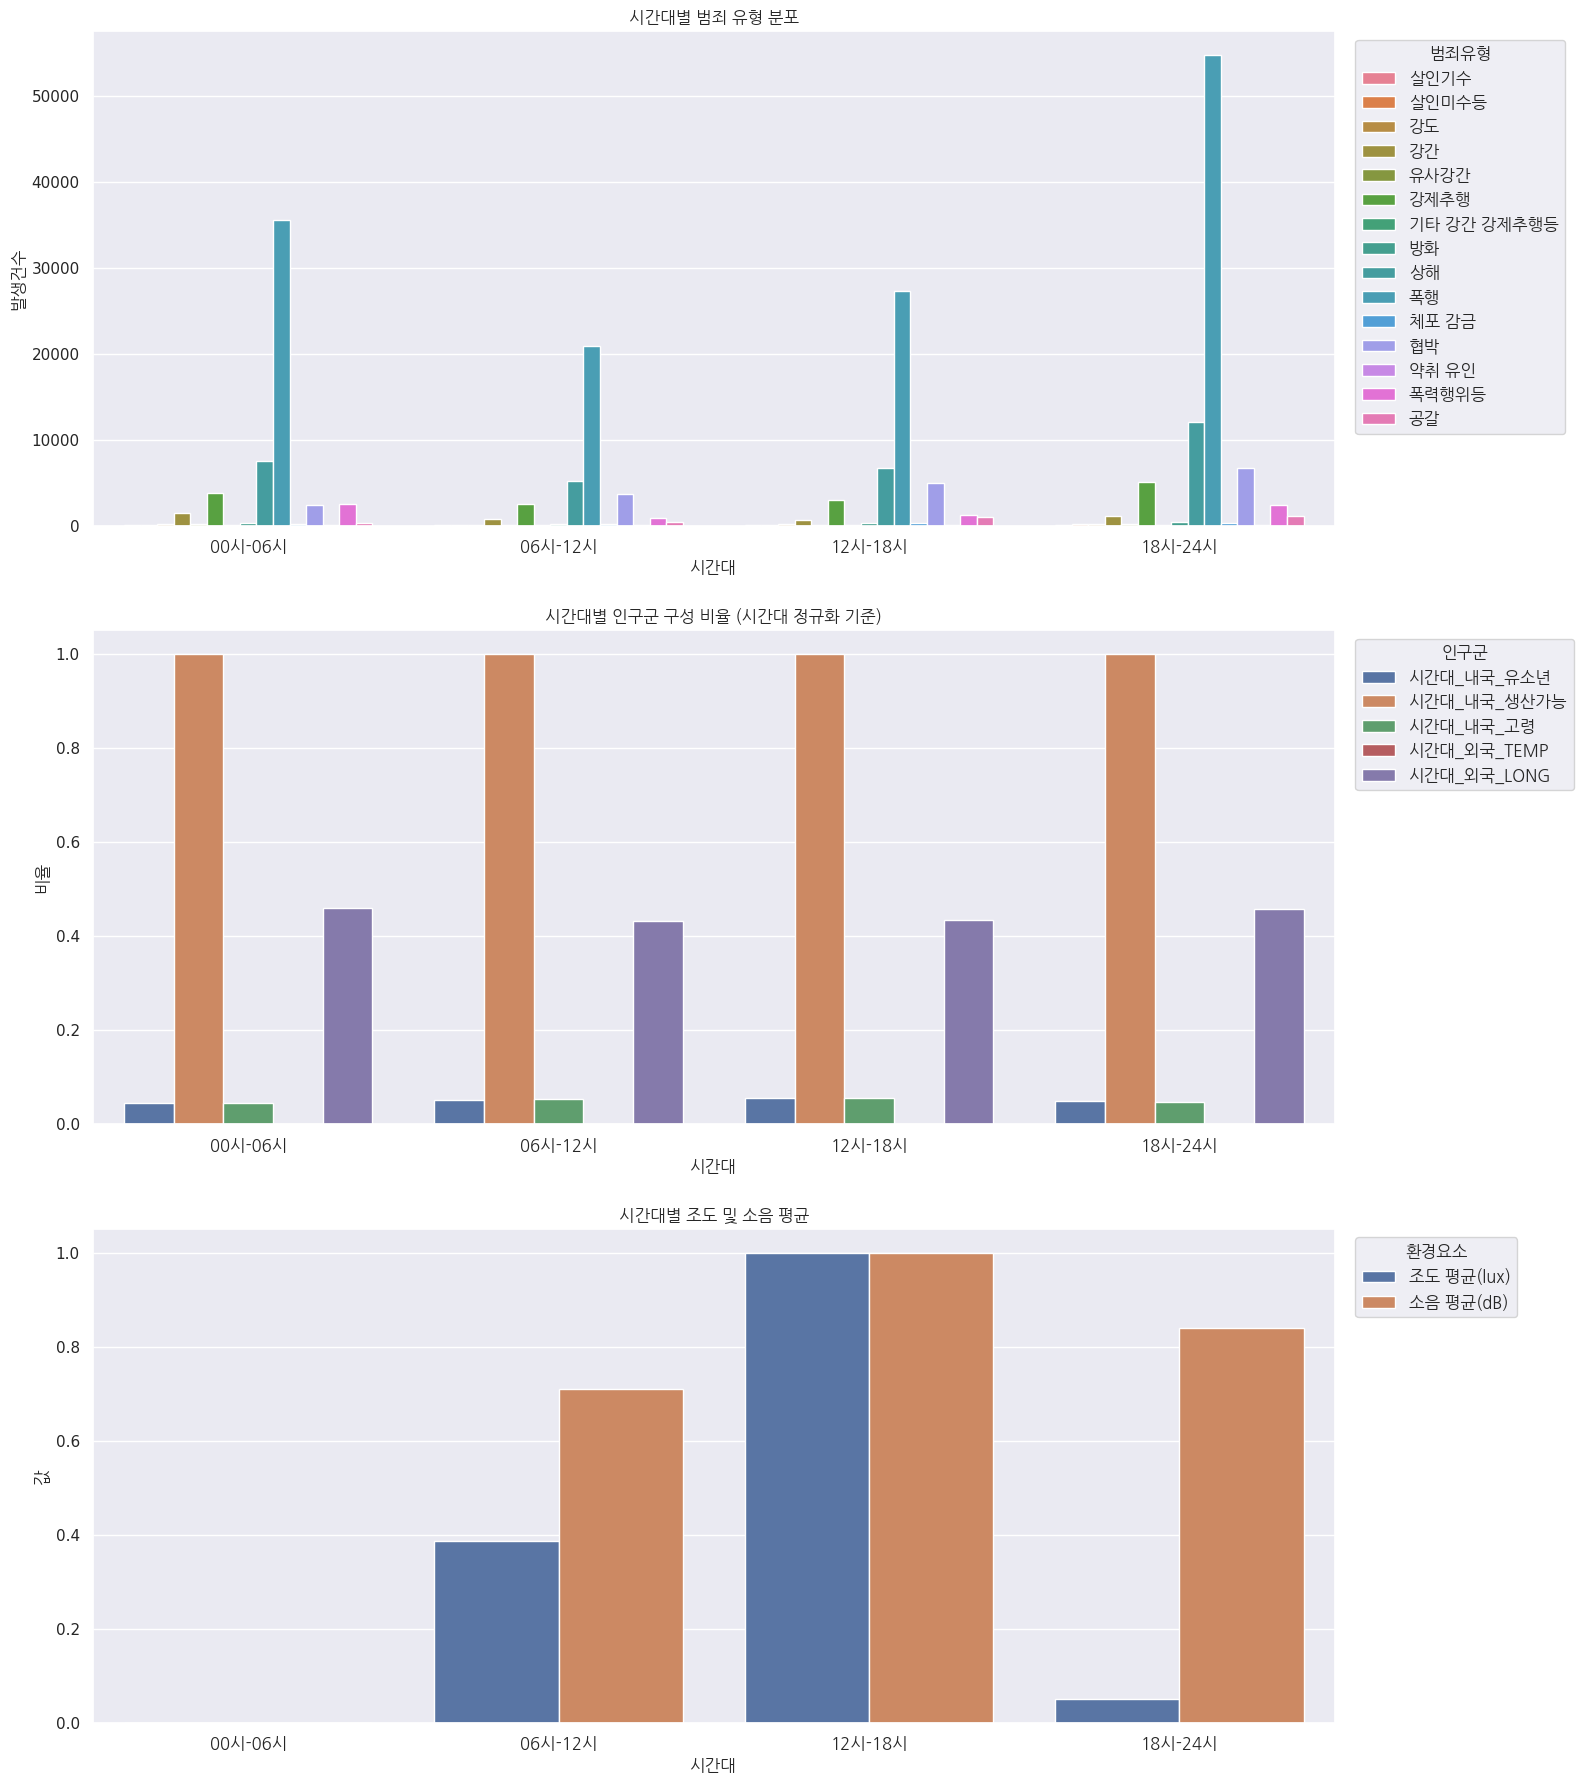

In [68]:
# ✅ 플롯 시작
fig, axs = plt.subplots(3, 1, figsize=(16, 18))

# -----------------------------------
# 1. 시간대별 범죄 유형 분포
sns.barplot(data=crime_long, x='시간대', y='발생건수', hue='범죄유형', ax=axs[0])
axs[0].set_title("시간대별 범죄 유형 분포", fontproperties=font_prop)
axs[0].set_xlabel("시간대", fontproperties=font_prop)
axs[0].set_ylabel("발생건수", fontproperties=font_prop)
legend1 = axs[0].legend(bbox_to_anchor=(1.01, 1), loc='upper left', title="범죄유형", prop=font_prop)
legend1.set_title("범죄유형", prop=font_prop)
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontproperties=font_prop)

# -----------------------------------
# 2. 시간대별 인구군 비율 (정규화)
sns.barplot(data=pop_long, x='시간대', y='비율', hue='인구군', ax=axs[1])
axs[1].set_title("시간대별 인구군 구성 비율 (시간대 정규화 기준)", fontproperties=font_prop)
axs[1].set_xlabel("시간대", fontproperties=font_prop)
axs[1].set_ylabel("비율", fontproperties=font_prop)
legend2 = axs[1].legend(bbox_to_anchor=(1.01, 1), loc='upper left', title="인구군", prop=font_prop)
legend2.set_title("인구군", prop=font_prop)
axs[1].set_xticklabels(axs[1].get_xticklabels(), fontproperties=font_prop)

# -----------------------------------
# 3. 조도 및 소음
env_plot = df[['시간대', '조도 평균(lux)', '소음 평균(dB)']].melt(
    id_vars='시간대', var_name='환경요소', value_name='값'
)
sns.barplot(data=env_plot, x='시간대', y='값', hue='환경요소', ax=axs[2])
axs[2].set_title("시간대별 조도 및 소음 평균", fontproperties=font_prop)
axs[2].set_xlabel("시간대", fontproperties=font_prop)
axs[2].set_ylabel("값", fontproperties=font_prop)
legend3 = axs[2].legend(bbox_to_anchor=(1.01, 1), loc='upper left', title="환경요소", prop=font_prop)
legend3.set_title("환경요소", prop=font_prop)
axs[2].set_xticklabels(axs[2].get_xticklabels(), fontproperties=font_prop)

plt.tight_layout()
plt.subplots_adjust(hspace=1.0)

# ✅ 전체 레이아웃 정리
plt.tight_layout()
plt.show()

범죄 유형 시간대별 흐름

In [115]:
df1 = pd.read_csv("전처리_시간대별_강력범죄_및_인구환경데이터.csv")

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# ✅ 한글 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["axes.unicode_minus"] = False

<ipython-input-102-b5af80b0329a>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_grouped = crime_long.groupby(['범죄유형', '시간대'], as_index=False)['건수'].sum()
<ipython-input-102-b5af80b0329a>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop)


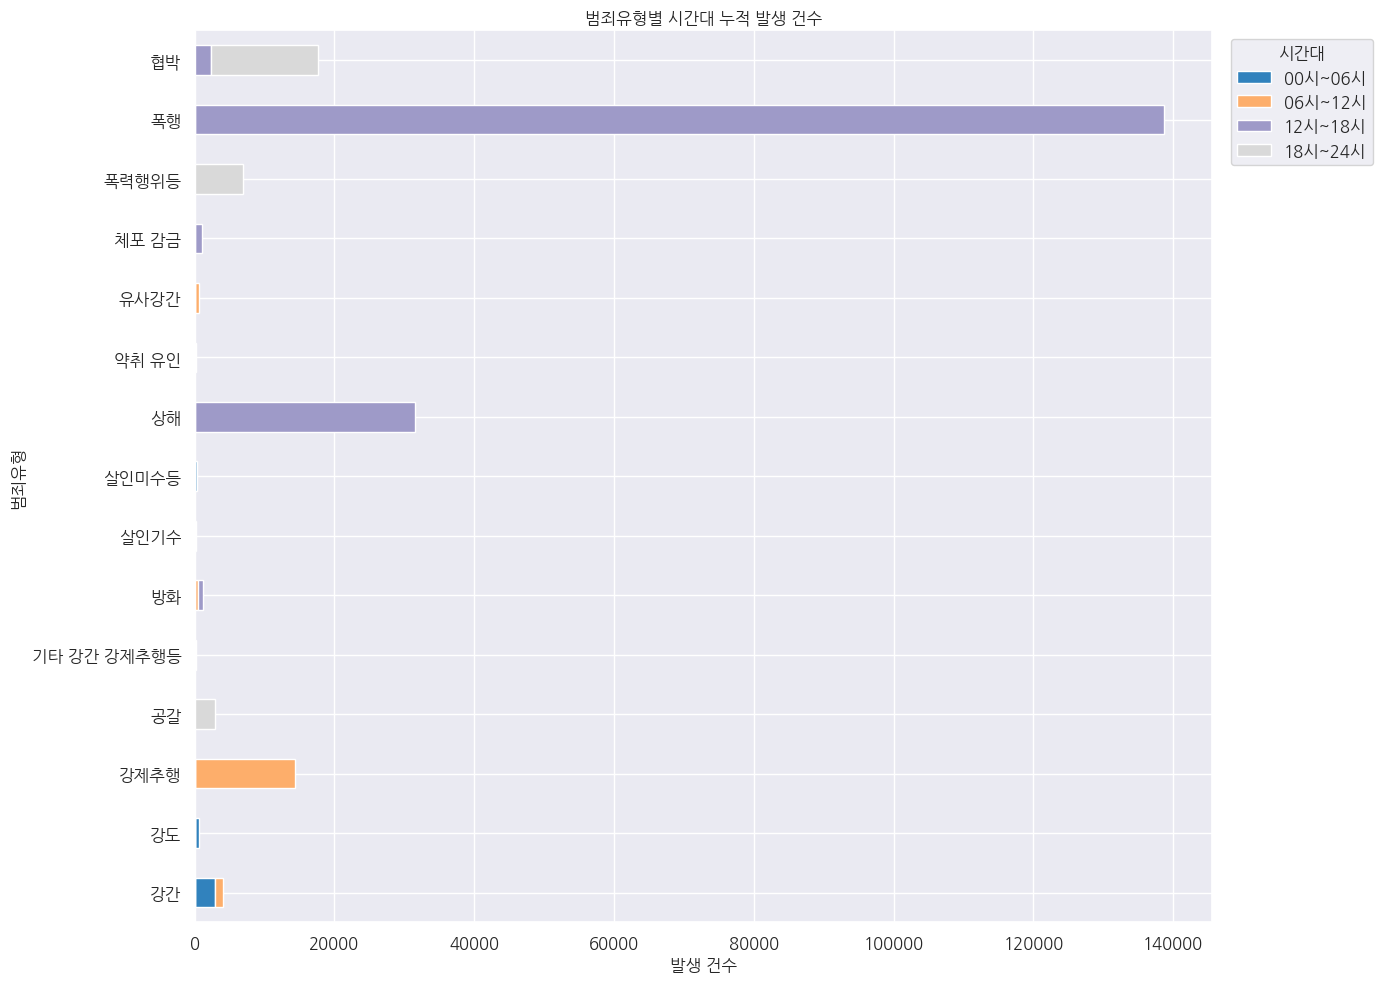

In [102]:
# 1. 범죄 컬럼 정의
crime_cols = [
    '살인기수', '살인미수등', '강도', '강간', '유사강간', '강제추행',
    '기타 강간 강제추행등', '방화', '상해', '폭행', '체포 감금', '협박',
    '약취 유인', '폭력행위등', '공갈'
]

# 2. 시간대 리스트 만들기 (4시간대 × 15 범죄유형 = 60행)
시간대순서 = ['00시~06시', '06시~12시', '12시~18시', '18시~24시']
시간대값 = []
for 시간대 in 시간대순서:
    시간대값.extend([시간대] * len(crime_cols))  # 각 시간대마다 15개

# 3. melt
crime_long = df1[crime_cols].melt(var_name='범죄유형', value_name='건수')
crime_long['시간대'] = 시간대값

# 4. 시간대 순서 적용
crime_long['시간대'] = pd.Categorical(crime_long['시간대'], categories=시간대순서, ordered=True)

# 5. groupby
crime_grouped = crime_long.groupby(['범죄유형', '시간대'], as_index=False)['건수'].sum()

# 6. 시각화
ax = pivot_df.plot(kind='barh', stacked=True, figsize=(14, 10), colormap='tab20c')
# ✅ 제목/축/범례에 한글 폰트 적용
plt.title("범죄유형별 시간대 누적 발생 건수", fontsize=16, fontproperties=font_prop)
plt.xlabel("발생 건수", fontproperties=font_prop)
plt.ylabel("범죄유형", fontproperties=font_prop)

# ✅ x/y축 눈금에도 폰트 적용
ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop)
ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font_prop)

# ✅ 범례 한글 폰트 적용
legend = plt.legend(title="시간대", bbox_to_anchor=(1.01, 1), loc='upper left', prop=font_prop)
legend.set_title("시간대", prop=font_prop)

plt.tight_layout()
plt.show()

#범죄 유형별 비율로 시간대별 분포 확인하기


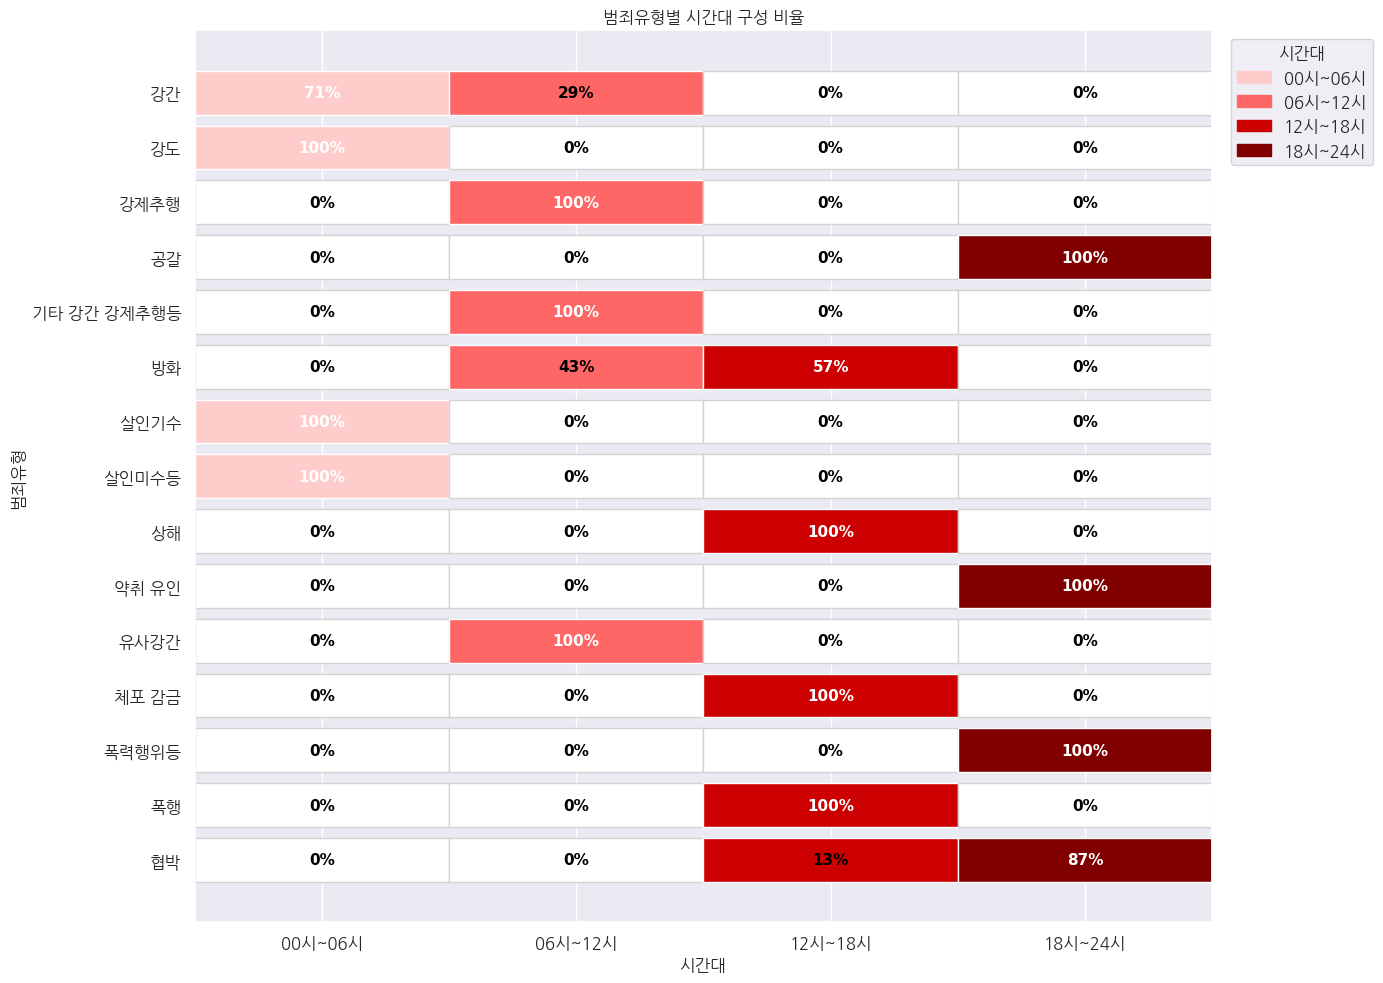

In [117]:
# 10. 시각화
fig, ax = plt.subplots(figsize=(14, 10))

# 색상 고정: 시간대별 붉은 계열
colors = {
    '00시~06시': '#ffcccc',
    '06시~12시': '#ff6666',
    '12시~18시': '#cc0000',
    '18시~24시': '#800000'
}

범죄유형_list = pivot_ratio.index.tolist()
시간대개수 = len(시간대순서)
bar_width = 1 / 시간대개수  # 각 시간대 구간 폭: 0.25

# 범죄유형별로 각 시간대 위치에 막대 그리기
for i, crime in enumerate(범죄유형_list):
    for j, 시간대 in enumerate(시간대순서):
        비율 = pivot_ratio.loc[crime, 시간대]
        left = j * bar_width
        if 비율 > 0:
            ax.barh(i, bar_width, left=left, color=colors[시간대])
        else:
            ax.barh(i, bar_width, left=left, color='white', edgecolor='lightgray')  # 빈 공간도 동일 간격 유지

        # 비율 텍스트 삽입
        ax.text(left + bar_width / 2, i, f"{비율 * 100:.0f}%",
                ha='center', va='center', color='black' if 비율 < 0.5 else 'white',
                fontsize=11, fontweight='bold')

# y축 범죄유형
ax.set_yticks(range(len(범죄유형_list)))
ax.set_yticklabels(범죄유형_list, fontproperties=font_prop)

# x축 (비율 대신 시간대 영역 표시)
ax.set_xticks([i * bar_width + bar_width / 2 for i in range(시간대개수)])
ax.set_xticklabels(시간대순서, fontproperties=font_prop)

# 기타 설정
ax.set_title("범죄유형별 시간대 구성 비율", fontsize=16, fontproperties=font_prop)
ax.set_xlim(0, 1)
ax.set_xlabel("시간대", fontproperties=font_prop)
ax.set_ylabel("범죄유형", fontproperties=font_prop)
ax.invert_yaxis()  # 위에서 아래로 표시

# 시간대별 색상 범례 수동 생성
import matplotlib.patches as mpatches

# 시간대별 범례 박스 패치 생성
legend_patches = [
    mpatches.Patch(color=color, label=label)
    for label, color in colors.items()
]

# 범례 출력
legend = ax.legend(
    handles=legend_patches,
    title='시간대',
    bbox_to_anchor=(1.01, 1),
    loc='upper left',
    prop=font_prop,
    title_fontproperties=font_prop
)

plt.tight_layout()



---



In [103]:
# 2. 데이터 불러오기 (df2로 저장)
df2 = pd.read_csv("전처리_시간대별_강력범죄_및_인구환경데이터.csv")

# 3. 분석할 범죄 컬럼 정의
crime_cols = [
    '살인기수', '살인미수등', '강도', '강간', '유사강간', '강제추행',
    '기타 강간 강제추행등', '방화', '상해', '폭행', '체포 감금', '협박',
    '약취 유인', '폭력행위등', '공갈'
]

# 4. 시간대 정의 및 반복 생성 (15범죄 * 4시간대 = 60행)
시간대순서 = ['00시~06시', '06시~12시', '12시~18시', '18시~24시']
시간대값 = []
for 시간대 in 시간대순서:
    시간대값.extend([시간대] * len(crime_cols))

# 5. long-form 변환
crime_long = df2[crime_cols].melt(var_name='범죄유형', value_name='건수')
crime_long['시간대'] = 시간대값
crime_long['시간대'] = pd.Categorical(crime_long['시간대'], categories=시간대순서, ordered=True)

# 6. 시간대별 범죄유형 합계 집계
crime_grouped = crime_long.groupby(['범죄유형', '시간대'], as_index=False)['건수'].sum()

# 7. 피벗 (범죄유형 행, 시간대 열)
pivot_df = crime_grouped.pivot(index='범죄유형', columns='시간대', values='건수').fillna(0)

# 8. 비율 정규화 (각 범죄유형 총합 대비 시간대 비율)
pivot_ratio = pivot_df.div(pivot_df.sum(axis=1), axis=0).fillna(0)

# 9. 한글 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["axes.unicode_minus"] = False

<ipython-input-103-2a05422ac179>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_grouped = crime_long.groupby(['범죄유형', '시간대'], as_index=False)['건수'].sum()


<ipython-input-105-3d5f1bb73678>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop)
<ipython-input-105-3d5f1bb73678>:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font_prop)


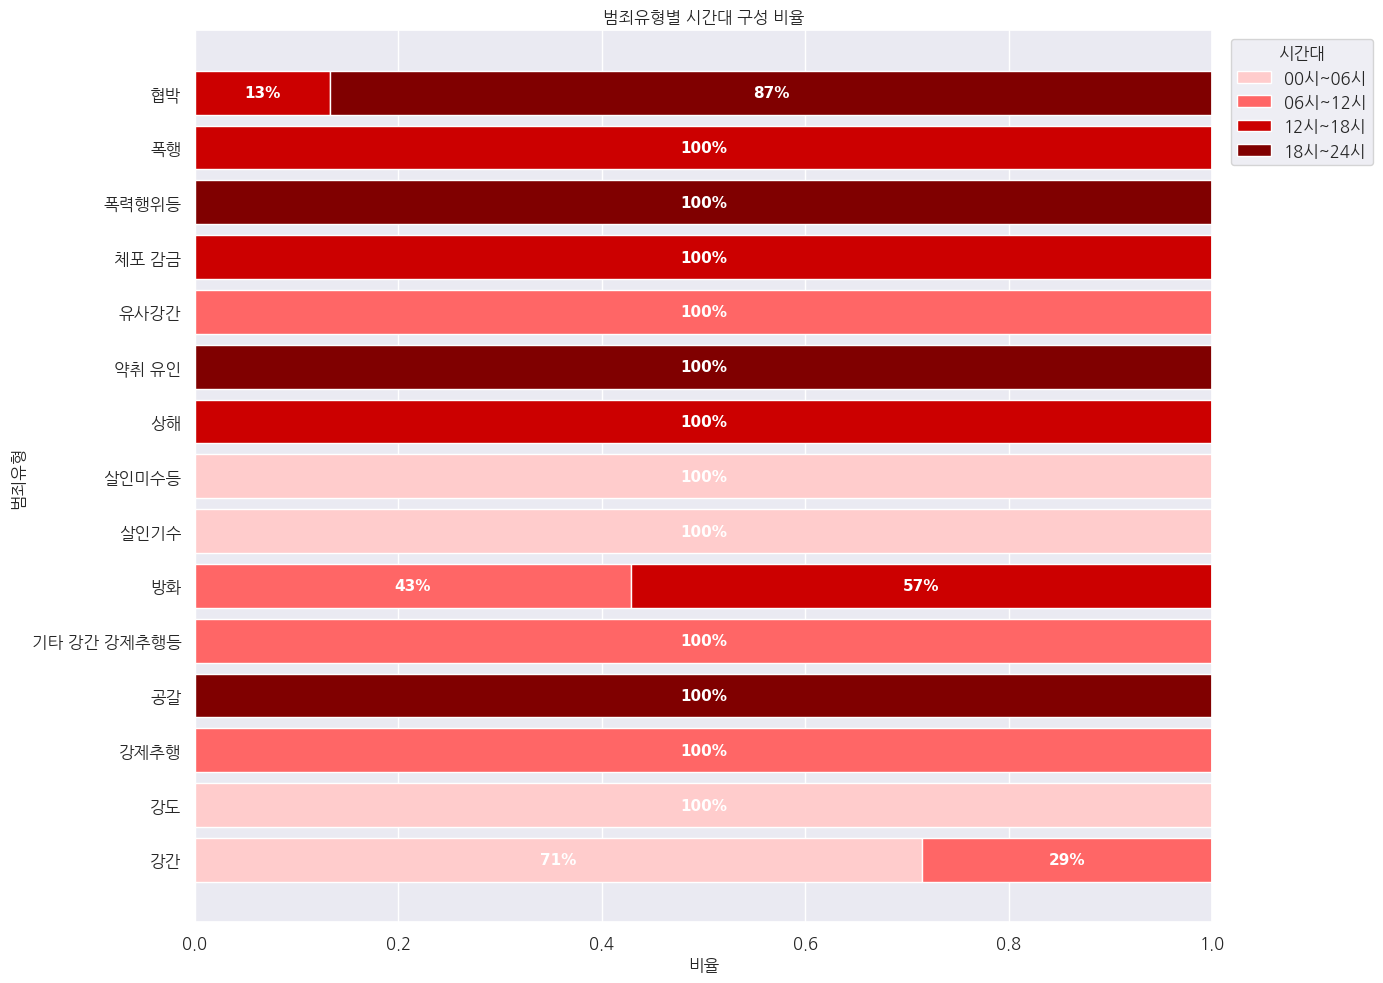

In [105]:
# 10. 시각화
fig, ax = plt.subplots(figsize=(14, 10))

# 수동 색상 지정
colors = {
    '00시~06시': '#ffcccc',
    '06시~12시': '#ff6666',
    '12시~18시': '#cc0000',
    '18시~24시': '#800000'
}

# 누적 막대 차트 수동 생성
lefts = [0] * len(pivot_ratio)
범죄유형_list = pivot_ratio.index.tolist()

for 시간대 in 시간대순서:
    비율 = pivot_ratio[시간대]
    bars = ax.barh(범죄유형_list, 비율, left=lefts, color=colors[시간대], label=시간대)

    # 막대 내부에 텍스트 삽입
    for i, (v, l) in enumerate(zip(비율, lefts)):
        if v > 0:
            ax.text(l + v / 2, i, f"{v*100:.0f}%", va='center', ha='center', color='white', fontsize=11, fontweight='bold')

    # left 위치 업데이트
    lefts = [l + v for l, v in zip(lefts, 비율)]

# 제목/레이블/폰트 설정
ax.set_title("범죄유형별 시간대 구성 비율", fontsize=16, fontproperties=font_prop)
ax.set_xlabel("비율", fontproperties=font_prop)
ax.set_ylabel("범죄유형", fontproperties=font_prop)
ax.set_xlim(0, 1)

# 축 폰트
ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop)
ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font_prop)

# 범례
legend = ax.legend(title="시간대", bbox_to_anchor=(1.01, 1), loc='upper left', prop=font_prop)
legend.set_title("시간대", prop=font_prop)

plt.tight_layout()
plt.show()